## Exercise 3
In the videos you looked at how you would improve Fashion MNIST using Convolutions. For your exercise see if you can improve MNIST to 99.8% accuracy or more using only a single convolutional layer and a single MaxPooling 2D. You should stop training once the accuracy goes above this amount. It should happen in less than 20 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your layers.

I've started the code for you -- you need to finish it!

When 99.8% accuracy has been hit, you should print out the string "Reached 99.8% accuracy so cancelling training!"


In [5]:
import sys
sys.path.append('/mnt/functions')
import load_data

import matplotlib.pyplot as plt

In [23]:
(training_images, training_labels), (test_images, test_labels) = load_data.mnist_load_data()

In [30]:
print(test_images.shape)
print(training_images.shape)

(10000, 28, 28, 1)
(60000, 28, 28)


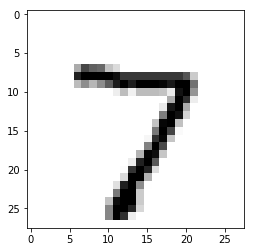

In [26]:
plt.imshow(test_images[0], cmap = 'gray_r')

In [38]:
import tensorflow as tf

# YOUR CODE STARTS HERE
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get('acc') >= .998:
            print('\nReached .998 training validation accuracy. Stoping Training.')
            self.model.stop_training = True
            
callback = mycallback()

# YOUR CODE ENDS HERE

mnist = tf.keras.datasets.mnist
# (training_images, training_labels), (test_images, test_labels) = mnist.load_data()
(training_images, training_labels), (test_images, test_labels) = load_data.mnist_load_data()

# YOUR CODE STARTS HERE
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0
# YOUR CODE ENDS HERE

model = tf.keras.models.Sequential([
    # YOUR CODE STARTS HERE
    tf.keras.layers.Conv2D(filters = 64, kernel_size= (3,3), activation= 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size= (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units= 128, activation= 'relu'),
    tf.keras.layers.Dense(units = 10, activation= 'softmax')
    # YOUR CODE ENDS HERE
])

# YOUR CODE STARTS HERE
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()
# model.fit(training_images, training_labels, epochs = 20, validation_split = .2)
model.fit(training_images, training_labels, epochs = 20, callbacks = [callback])
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)
# YOUR CODE ENDS HERE



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 10816)             0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               1384576   
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
60000/60000 [==============================] - 35s 585us/step - loss: 0.1349 - acc: 0.9600
Epoch 2/20
60000/60000 [======